In [1]:
from ml1.preamble import*
from sklearn.datasets import load_files

reviews_train = load_files('ml1/data/aclImdb/aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" " ) for doc in text_train]

# LDA

* 비지도 학습으로 함께 자주 나타나는 단어의 토픽을 찾음

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [3]:
lda.components_.shape

(10, 10000)

In [4]:
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [5]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [6]:
topic7 = np.argsort(document_topics100[:, 7])[::-1]

for i in topic7[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'This is a very amusing and sometimes quite creepy anthology, that if a bit short in the screenwriting department, more than makes up for the shortcoming in the acting, location work and overall exuberance. The best episodes of this are the first with Denholm Elliot playing a horror writer stalked by a character from his novel in the works ( a perfect example of the acting pulling this out of the merely pedestrian); the third, with Christopher Lee as a man terrified of his own daughter and the final episode with the late great Jon Pertwee as a pompous horror film star who gets more than just a new role on his latest project.\n'
b"A classy offering from Amicus, producer Milton Subotsky and director Peter Duffell ('The Far Pavillions' etc) turn in a classy, intelligent 'four-hander' with a strong cast (Peter Cushing, Christopher Lee, Jon Pertwee, Ingrid Pitt etc) all giving stylish performances, despite a low budget which results in a few 'un-special effects'. The most outstanding contr

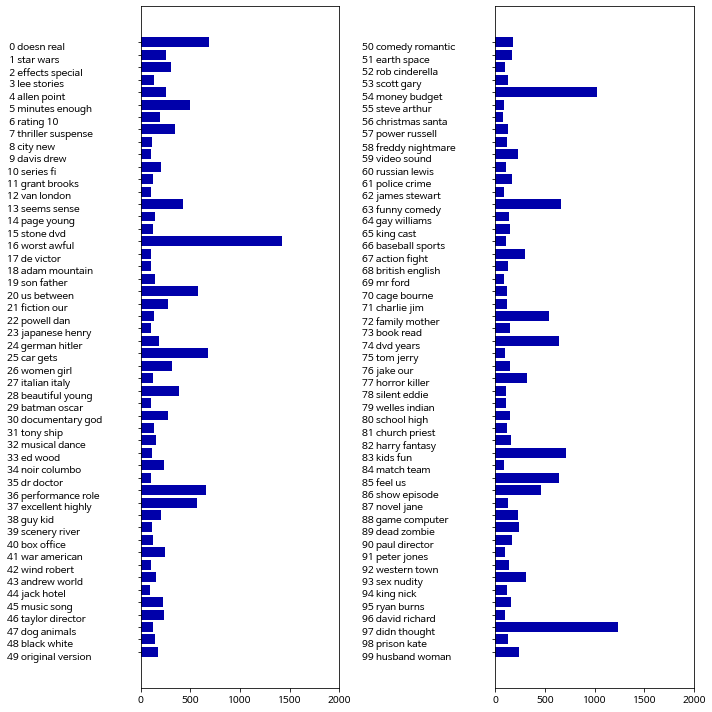

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()